In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
x = df.iloc[:,:-1]
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


Scaled X

Numpy

In [ ]:
x = np.array(x)
x_scaled = (x-x.mean(axis=0))/x.std(axis=0)
x =x_scaled

Scikit

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert to numpy array and add bias term
x_scaled = np.array(x_scaled)
stacked_array = np.column_stack((x_scaled, np.ones(len(x_scaled))))

In [ ]:
y_target = df["median_house_value"]

In [ ]:
x = np.array(x)
#print(x,len(x),len(np.ones(len(x))),df.size//9)
stacked_array = np.column_stack((x,np.ones(len(x))))

In [ ]:
#print(stacked_array)
transpose = np.transpose(stacked_array)
X= transpose@stacked_array
#X = np.einsum("i j , j l -> i l",transpose,stacked_array)
inv = np.linalg.inv(X)
normal_weights =(inv@transpose)@y_target

In [ ]:
print(normal_weights)

[-86499.60728226 -91744.05083061  14483.29860201 -18263.60700749
  49587.33777166 -44178.15153005  17470.57604338  77291.55314914
 207300.91235294]


In [ ]:
print(stacked_array)

[[ 2.619365   -0.67152023 -1.07967114 ... -0.07599796 -1.25254316
   1.        ]
 [ 2.53956878 -0.57326437 -0.76187201 ... -0.09940441 -1.08148298
   1.        ]
 [ 2.4946834  -0.90546278 -0.92077158 ... -0.99925206 -1.17010515
   1.        ]
 ...
 [-2.36291168  2.90780067 -0.92077158 ... -0.11760942 -0.44666313
   1.        ]
 [-2.36291168  2.88908527 -0.76187201 ... -0.06039367 -0.99778717
   1.        ]
 [-2.387848    2.29955006  1.85997083 ... -0.60134255 -0.45536288
   1.        ]]


In [ ]:
def compute_function_normal(x,w):
   return (x@w)

In [ ]:
def loss(y,y_pred):
  return np.mean((y-y_pred)**2)
def compute(y,x,w):
  return loss(y,compute_function_normal(x,w))


In [ ]:
h = 1e-5
def differentiate(function,y,x,weights,arg): #vector differentiation
  modified_weights = weights.copy()
  modified_weights[arg] += h
  return (function(y,x,modified_weights) - function(y,x,weights))/h
#weights = np.arra
w = np.zeros((normal_weights.shape))
alpha  = 0.01
epochs = 10000
w_ = []
l_ = []
for i in range(epochs):
  grad = np.zeros_like(w)
  for j in range(len(w)):
    grad[j] = differentiate(compute,y_target,stacked_array,w,j)
  w = w-(alpha*grad)
  l_.append(compute(y_target,stacked_array,w))
print(w,len(w))


[-86400.63476562 -91667.34695435  14475.95310211 -18028.68843079
  48351.03225708 -44410.54439545  18694.29969788  77225.39234161
 207300.91381073] 9


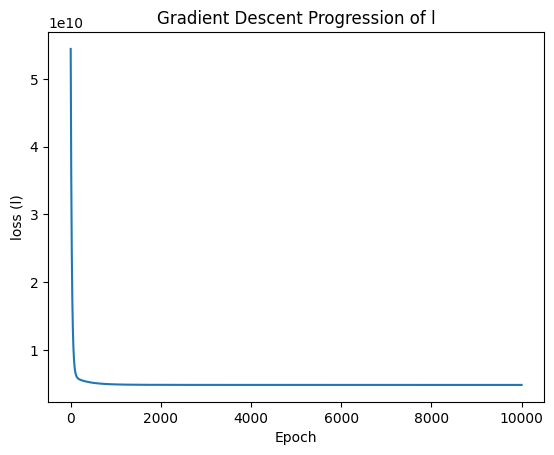

In [ ]:
import matplotlib.pyplot as plt

plt.plot(l_)
plt.xlabel('Epoch')
plt.ylabel('loss (l)')
plt.title('Gradient Descent Progression of l')
plt.show()

Validate

In [ ]:
compute(y_test,x_test,normal_weights)

np.float64(2.190242469118775e+16)

Test

In [ ]:
valid_df = pd.read_csv("california_housing_test.csv")
x_test = np.array(valid_df.iloc[:,:8])
x_test = np.array(x_test)
#x_test = np.column_stack((x_test**2,x_test))
x_scaled_test = (x_test-x_test.mean(axis=0))/x_test.std(axis=0)
x_test =x_scaled_test
x_test = np.column_stack((x_test,np.ones(len(x_test))))
y_test = np.array(valid_df.iloc[:,-1])


In [ ]:
x_test = np.array(x_test)
x_scaled_test = (x_test-x_test.mean(axis=0))/x_test.std(axis=0)
x_test =x_scaled_test

/tmp/ipython-input-2061607131.py:2: RuntimeWarning: invalid value encountered in divide
  x_scaled_test = (x_test-x_test.mean(axis=0))/x_test.std(axis=0)


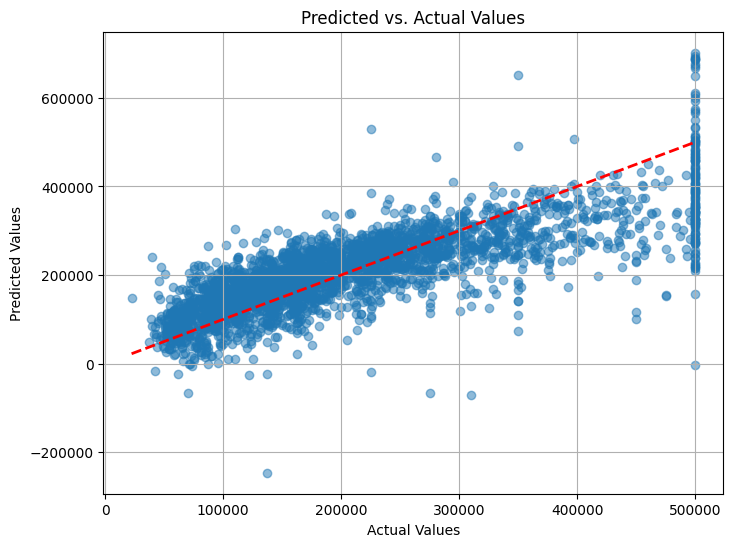

In [ ]:
import matplotlib.pyplot as plt
y_pred = compute_function_normal(x_test,normal_weights)
# Assuming y_test contains the true values and y_pred contains your model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2) # The 45-degree line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
residuals = y_test - y_pred

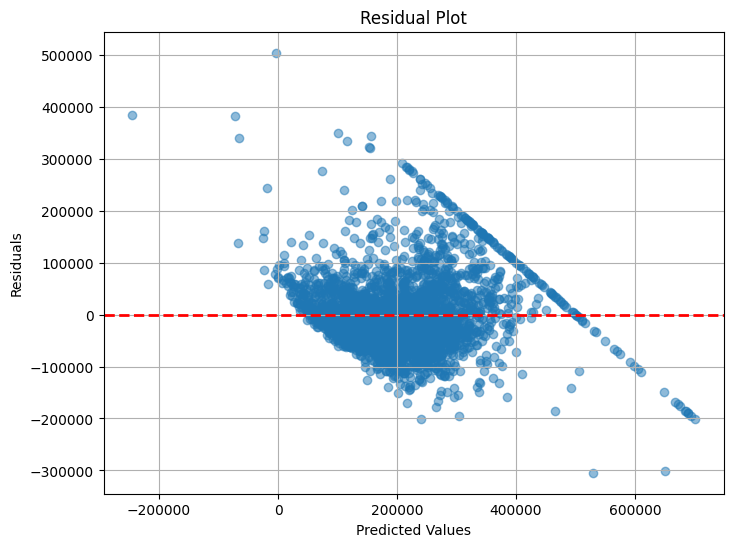

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', lw=2)

# Add labels and a title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

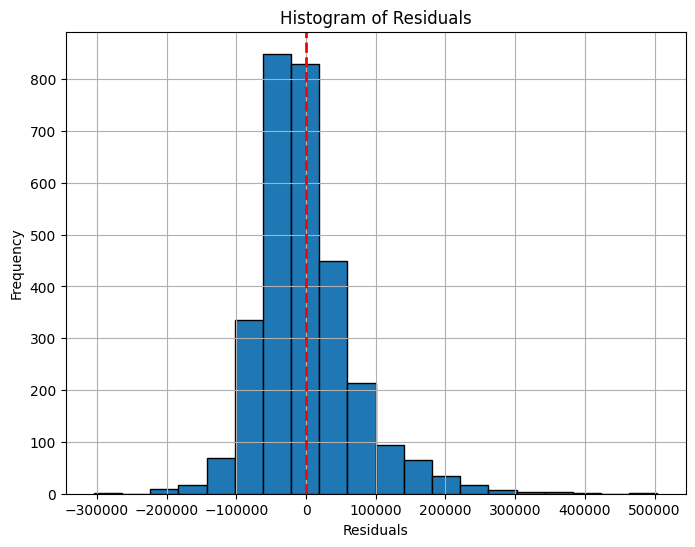

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration purposes
# In your actual use case, you would use your model's y_pred and residuals
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', alpha=1)

# Add a vertical line at x=0 for reference
plt.axvline(x=0, color='red', linestyle='--', lw=2)

# Add labels and a title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

# Save the plot to a file
plt.savefig('residuals_histogram.png')

In [ ]:
np.sqrt(np.sum((((compute_function_normal(x_test,w)-y_test)**2)/(y_test.size))))

np.float64(69896.79835164563)

np.float64(4886020526.855478)